# Boosting

- AdaBoost, very powerful, one of the best off the shelf / plug and play algorithms
- Different from bagging/random forests: we wanted low bias, high variance models
- now we want high bias models
- In AdaBoost nomenclature: we want weak learners
- 50-60% accuracy


- Hypothesis is that combining many weak learners can yield a string learner
- as with stacking,  we want to weight each learner

$$
F(x) = \sum_{m=1}^{M}\alpha_{m}f_{m}(x)
$$

## Weak Learners
- How do we get weak learners?
- Decision Tree with max_depth = 1(decision stump)
- This is only splits the space in half
- Remarkable that a combination of these can yield a strong learner
- another weak learner : logistic regression
- advantage: weak learners train fast, can easily train 1000s of weak learners

## Details

- we will use targets{+1,-1}, not{0,1}
- you'll see why later
- we can modify existing algorithms like so

$$
\text{Modified Logistic Output(x)} = 2LogisticOutput(x) -1
$$

- Decision boundary is 0
- Usually use $\alpha$ as model weights

$$
F_{M}(x) = sign(\sum_{m=1}^{M}\alpha_{m}f_{m}(x))
$$

![](https://mblogthumb-phinf.pstatic.net/20160330_250/dic1224_1459323262712kPNVH_JPEG/boosting.png?type=w2)

![](https://mblogthumb-phinf.pstatic.net/20160330_221/dic1224_1459323510463sJSv7_JPEG/adaboost1.png?type=w2)

## AdaBoost
- add one base model at a time(called additive modeling)
- Train base model on all data(no resampling/bootstrapping)
- Instead, we'll weight how important each sample is with w[i] , i = 1...N
- Modify w[i] on each round
- if we get(x[i],y[i]) wrong, then increase w[i], else decrease w[i]


- How to modify base model so it takes into account the weights of each sample
- for logistic regression

$$
J_{WEIGHTED} = \sum_{i=1}^{N}w_{i}[t_{i}log(y_{i}) + (1-t_{i})log(1-y_{i})]
$$

- for decision tree, SKlearn gives us an API to pass in sample weights,

- Train base model on all data(X,Y) with weights w[i] = 1,...N
- rest of the algorithm
- calculate error weighted by w[i]
- calculate $\alpha_{m}$ as a function of error
    - more accurate(less error) -> $\alpha_{m}$ should be bigger
- store $\alpha_{m}$ and $f_{m}$    

## Pseudocode

```python
Initialize w[i] = 1/N for i = 1...N #uniform distribution
for m = 1...M:
    Fit f_m(x) with sample weights w[i]
```   
$$
\epsilon_{m} = \frac{\sum_{i=1}^{N}w_{i}I(y_{i}\neq f_{m}(x))}{\sum_{i=1}^{N}w_{i}}\\
\alpha_{m} = \frac{1}{2}log[\frac{1-\epsilon_{m}}{\epsilon_{m}}]\\
w_{i} = w_{i}exp[-\alpha_{m}y_{i}f_{m}(x_{i})],i=1,...N\\
w_{i} = w_{i}/\sum_{j=1}^{N}w_{i} \text{# normalize w}\\
$$

- save $\alpha_{m},f_{m}(x)$


- very specific to binary classification, requiring labels{-1,+1}
- can be extended to multiclass classification and regression
- use scikit learn
- our goal is to capture the main idea
- like random forest,authors recommended treee as base model
- we will see linear classifier as base model again 

# Additive modeling

- forward stagewise additive modeling
- adaboost is an instance of this general algorithm

- L(y,f(x)) is the loss/cost function given target y and model f(x)
- F = full model, f = base model

$$
\text{Initialize }F_{0}(x) = 0\\
\text{for m = 1,...M:}\\
\text{    }(\alpha_{m}^*,\theta_{m}^*)= argmin_{\alpha_{m},\theta_{m}}\sum_{i=1}^{N}L(y_{i},F_{m-1}(x_{i})+\alpha_{m}f_{m}(x_{i};\theta_{m}))\\
F_{m}(x) = F_{m-1}(x) + \alpha_{m}^*f_{m}(x;\theta_{m}^*)
$$

# AdaBoost Loss Function: exponential Loss

## Loss Functions

- Binary Cross Entropy (binary classification)
- Multiclass cross entropy (multiclass classification)
- Squeared error(regression)
- Absolute error(repression)
- Accuracy(perceptron)
- AdaBoost-> Exponential Loss
- {+1,-1} doesn't make sense for cross entropy

## Exponential Loss

$$
L(y,f(x)) = exp(-yf(x))
$$

- when y & f(x) same sign -> 0
- when y & f(x) opposite sign -> inf
- has the same asymptotic effect as cross entropy


$$
\text{Initialize }F_{0}(x) = 0\\
\text{for m = 1,...M:}\\
\text{    }(\alpha_{m}^*,\theta_{m}^*)= argmin_{\alpha_{m},\theta_{m}}\sum_{i=1}^{N}L(y_{i},F_{m-1}(x_{i})+\alpha_{m}f_{m}(x_{i};\theta_{m}))\\
F_{m}(x) = F_{m-1}(x) + \alpha_{m}^*f_{m}(x;\theta_{m}^*)
$$

- replace L 

$$
\text{    }(\alpha_{m}^*,f_{m}^*)= argmin_{\alpha_{m},f_{m}}\sum_{i=1}^{N}exp\big\{ -y_{i}[F_{m-1}(x_{i})+ \alpha_{m}f_{m}(x_{i})] \big\}
$$




- Expand exponential


$$
J = \sum_{i=1}^{N}exp\big\{ -y_{i}[F_{m-1}(x_{i})+ \alpha_{m}f_{m}(x_{i})] \big\}\\
J = \sum_{i=1}^{N}exp\big\{ -y_{i}F_{m-1}(x_{i}) \big\} exp\big\{ -y_{i}\alpha_{m}f_{m}(x_{i}) \big\}\\
$$


- the first exponential is just w

$$
J = \sum_{i=1}^{N}w_{i}^{(m)} exp\big\{ -y_{i}\alpha_{m}f_{m}(x_{i}) \big\}\\
$$


- returning to the cose

- y $\cdot$f will always be +/-1
- +1 if correct, -1 if incorrect

- split into sum of corrects, sum of incorrects

$$
J = e^{-\alpha_{m}}\sum_{y_{i}=f_{m}(x)}^{}w_{i}^{(m)}+e^{\alpha_{m}}\sum_{y_{i}\neq f_{m}(x)}^{}w_{i}^{(m)}
$$

- simplify these symbols,drop m, first sum = A, second sum = B

- substitute:

$$
J = e^{-\alpha}A + e^{\alpha}B
$$

- differentiate and set to 0, solve for $\alpha$

$$
\frac{\partial J}{\partial \alpha} = - e^{-\alpha}A + e^{\alpha}B = 0\\
\alpha_{m} = \frac{1}{2}ln(\frac{A}{B}) = \frac{1}{2}ln(\frac{\text{number of weighted correct}}{\text{number of weighted incorrect}})
$$

- A and B represented as error rates(between 0 and 1) in original algorithm,
- but they are both divided by sum of w's on top and bottom, thus canceling out

## Summary

- Additive modeling doesn't specify loss function/other details
- AdaBoost does, so we replace L with exponential loss
- manipulate loss to recover w[i]
- optimize loss wrt alpha to recover alpha = func(weighted err)
- last step(derivative of J wrt alpha =0,solve alpha) is the most intellectually satisfying because it fits w/in the framwork of what we do w /logistic regression, neural network, perceptron

![](https://postfiles.pstatic.net/MjAxNzA0MTJfNjYg/MDAxNDkxOTg3MzE2NTEx.gAwXXAUqr0NHz1nqNPipkIFF0-ZY2C2GyQXqFUM3E04g.5Twv-UUVGoWvw_uOrOh3o817bgsKxxZ0FcAFcMBUB4wg.JPEG.dic1224/adaboost1.png?type=w2)

![](https://postfiles.pstatic.net/MjAxNzA0MTJfMjA5/MDAxNDkxOTg3MzgwODM2.PAsV4jR9iEIGnv3gpXVGTFUz9N7-Vco-0EoLgh68YmQg.nGqvr0KN3PXAbfTUT-WNsduWr-l33ohGlMi9G_NZqnMg.JPEG.dic1224/adaboost2.png?type=w2)

![](https://postfiles.pstatic.net/MjAxNzA0MjFfMjgz/MDAxNDkyNzc3NTQwNzM0.NMl-Qt7vwOb-_0OdAjmaC7uBV0VJPsuXz3W243ZUjVUg.f5_1dsr-4uYhhuc-S1dfYWKiWwapKXrtkwqDeBT-QpAg.JPEG.dic1224/adaboost_flowchart.jpg?type=w2)

[adaboost blog](https://m.blog.naver.com/dic1224/220669575477)

## In Code

In [2]:
import sys
sys.path.append("./data/") 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from rf_classification import get_data


In [3]:

class AdaBoost:
  def __init__(self, M):
    self.M = M

  def fit(self, X, Y):
    self.models = []
    self.alphas = []

    N, _ = X.shape
    W = np.ones(N) / N

    for m in range(self.M):
      tree = DecisionTreeClassifier(max_depth=1)
      tree.fit(X, Y, sample_weight=W)
      P = tree.predict(X)

      err = W.dot(P != Y)
      alpha = 0.5*(np.log(1 - err) - np.log(err))

      W = W*np.exp(-alpha*Y*P) # vectorized form
      W = W / W.sum() # normalize so it sums to 1

      self.models.append(tree)
      self.alphas.append(alpha)

  def predict(self, X):
    # NOT like SKLearn API
    # we want accuracy and exponential loss for plotting purposes
    N, _ = X.shape
    FX = np.zeros(N)
    for alpha, tree in zip(self.alphas, self.models):
      FX += alpha*tree.predict(X)
    return np.sign(FX), FX

  def score(self, X, Y):
    # NOT like SKLearn API
    # we want accuracy and exponential loss for plotting purposes
    P, FX = self.predict(X)
    L = np.exp(-Y*FX).mean()
    return np.mean(P == Y), L


In [4]:
X, Y = get_data()
Y[Y == 0] = -1 # make the targets -1,+1
Ntrain = int(0.8*len(X))
Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
Xtest, Ytest = X[Ntrain:], Y[Ntrain:]

T = 200
train_errors = np.empty(T)
test_losses = np.empty(T)
test_errors = np.empty(T)
for num_trees in range(T):
    if num_trees == 0:
      train_errors[num_trees] = None
      test_errors[num_trees] = None
      test_losses[num_trees] = None
      continue
    if num_trees % 20 == 0:
      print(num_trees)

    model = AdaBoost(num_trees)
    model.fit(Xtrain, Ytrain)
    acc, loss = model.score(Xtest, Ytest)
    acc_train, _ = model.score(Xtrain, Ytrain)
    train_errors[num_trees] = 1 - acc_train
    test_errors[num_trees] = 1 - acc
    test_losses[num_trees] = loss

    if num_trees == T - 1:
      print("final train error:", 1 - acc_train)
      print("final test error:", 1 - acc)



dimensionality: 139
20
40
60
80
100
120
140
160
180
final train error: 0.0
final test error: 0.0


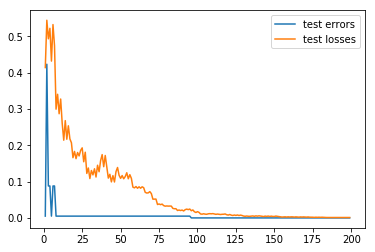

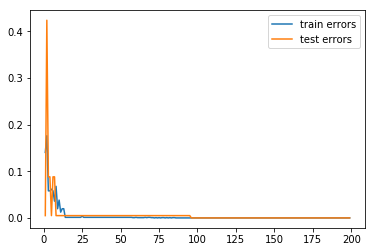

In [5]:
%matplotlib inline

plt.plot(test_errors, label='test errors')
plt.plot(test_losses, label='test losses')
plt.legend()
plt.show()

plt.plot(train_errors, label='train errors')
plt.plot(test_errors, label='test errors')
plt.legend()
plt.show()


In [6]:
Ytrain

array([ 1, -1, -1, ...,  1,  1,  1])